PRIMERO
suavisado = cv2.GaussianBlur(img, (5,5), 0)

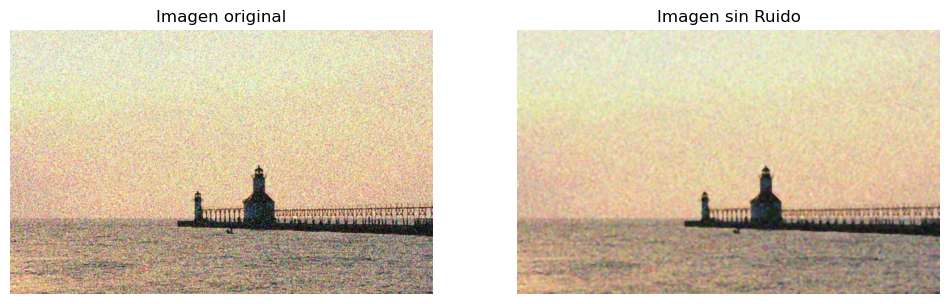

In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('ruido.jpg')
mediana = cv2.medianBlur(img, 5)

plt.figure(figsize=(12,10))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(mediana, cv2.COLOR_RGB2BGR))
plt.title('Imagen sin Ruido')
plt.axis('off')

plt.show()


(np.float64(-0.5), np.float64(959.5), np.float64(639.5), np.float64(-0.5))

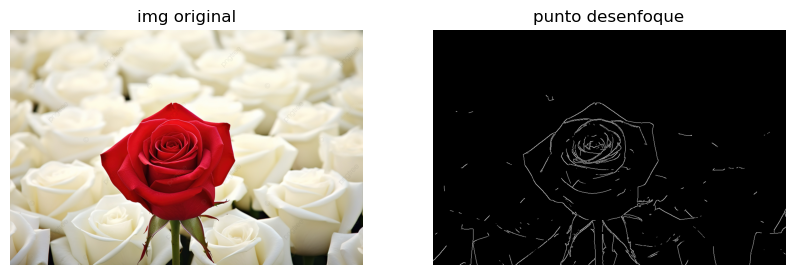

In [107]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('rosa.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
recorte = cv2.Canny(gray,255,255)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('img original')
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('punto desenfoque')
plt.imshow(cv2.cvtColor(recorte, cv2.COLOR_BGR2RGB))
plt.axis('off')


SEGUNDO

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def desenfoque(img):
    img1 = np.copy(img)
    recorte = cv2.Canny(gray, 255, 255)
    img_mask = cv2.bitwise_and(img, recorte)
    desenfoque = cv2.GaussianBlur(img_mask, (15, 15), 0)
    img1[recorte!=0] = desenfoque[recorte!=0]
    return img1


img = cv2.imread('rosa.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_desenfoque = desenfoque(img)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('img original')
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('punto desenfoque')
plt.imshow(cv2.cvtColor(img_desenfoque, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

error: OpenCV(4.11.0) D:\bld\libopencv_1743559210376\work\modules\core\src\arithm.cpp:214: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'cv::binary_op'


TERCERO

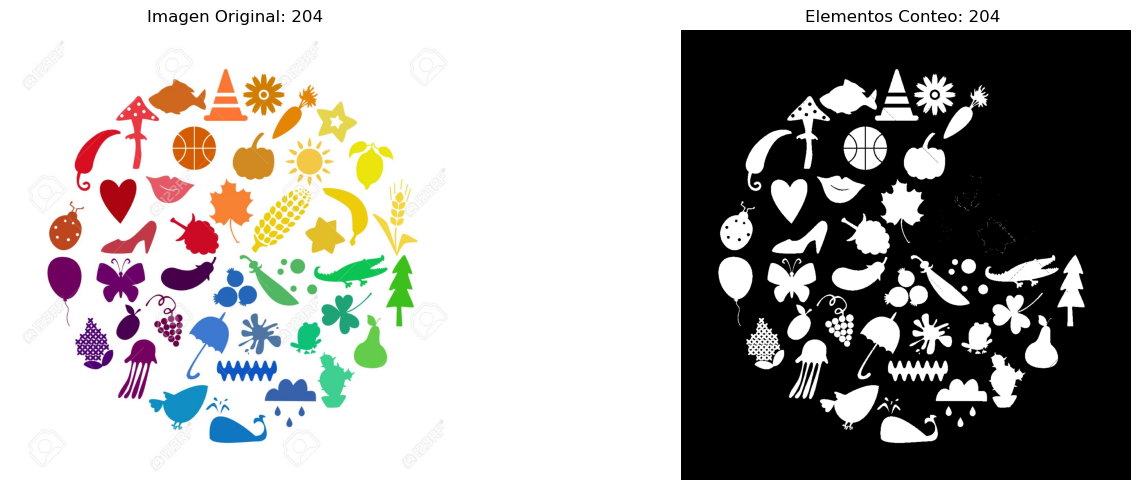

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

def contar(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binaria = cv2.threshold(img_gray, 180, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    borde,_ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cont = len(borde)
    return cont, binaria



imagen = cv2.imread('elementos.jpg')
img_cont, bin = contar(imagen)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title(f'Imagen Original: {img_cont}')
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Elementos Conteo: {img_cont} ')
plt.imshow(bin, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


CUARTO

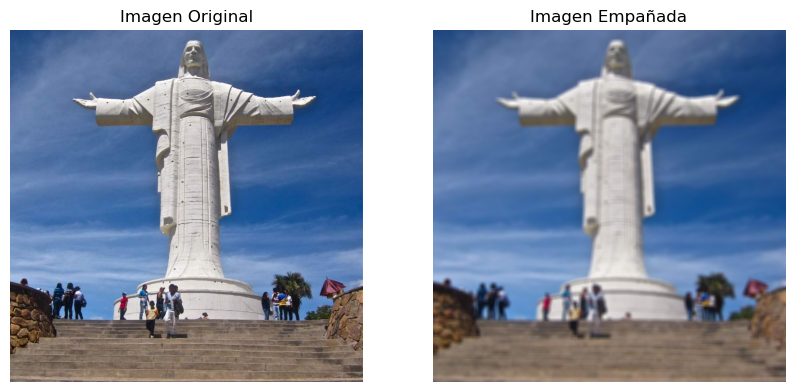

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def convulsion_media_bidimensional(imagen, tamañoKernel):
    kernel = np.ones((tamañoKernel, tamañoKernel), np.float32) / (tamañoKernel * tamañoKernel)
    return cv2.filter2D(imagen, -1, kernel)


imagen = cv2.imread('cristo.jpg')
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

img_rest = convulsion_media_bidimensional(gris,10)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen Empañada')
plt.imshow(img_rest, cmap='gray')
plt.axis('off')

plt.show()

CINCO

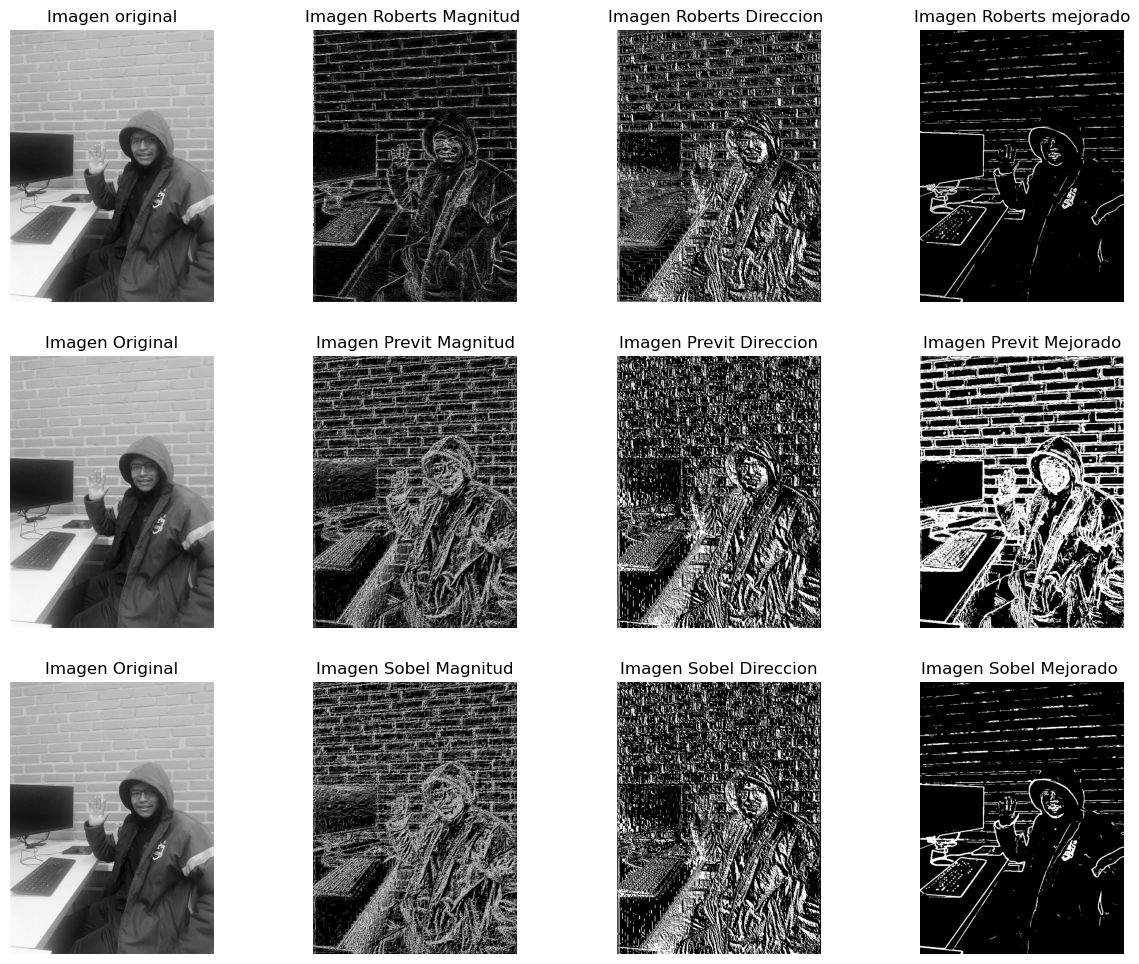

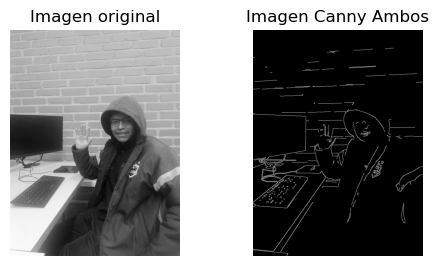

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def fil_robert(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    robertx = np.array([[-1, 0], [0, 1]])
    roberty = np.array([[0, -1], [1, 0]])

    img_robx = cv2.filter2D(img_gray, -1, robertx)
    img_roby = cv2.filter2D(img_gray, -1, roberty)

    rbg_gMagnitud = np.sqrt(img_robx ** 2 + img_roby ** 2)
    rgb_gDireccion = np.arctan2(img_roby, img_robx)

    return rbg_gMagnitud, rgb_gDireccion

def fil_robert_mejorada(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    suavido = cv2.GaussianBlur(img_gray, (3, 3), 0)

    kernelx = np.array([[2, 0], [0, -2]], dtype=np.float32)
    kernely = np.array([[0, 2], [-2, 0]], dtype=np.float32)

    robrx = cv2.filter2D(suavido, cv2.CV_16S, kernelx)
    robrt = cv2.filter2D(suavido, cv2.CV_16S, kernely)

    robert2 = cv2.addWeighted(np.abs(robrx), 0.7, np.abs(robrt), 0.7, 0)

    _, bordes = cv2.threshold(robert2, 30, 255, cv2.THRESH_BINARY)
    return bordes

def fil_previt(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    previttx = np.array([(1, 0, -1),(1, 0, -1),(1, 0, -1)]) 
    previtty = np.array([(1, 1, 1),(0, 0, 0),(-1, -1, -1)]) 

    img_prevx = cv2.filter2D(img_gray, -1, previttx)
    img_prevy = cv2.filter2D(img_gray, -1, previtty)

    prev_mag = np.sqrt(img_prevx ** 2 + img_prevy ** 2)
    prev_dir = np.arctan2(img_prevx , img_prevy)

    return prev_mag, prev_dir

def fil_previt_mejorada(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    img_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)

    previtx = np.array([[3, 0, -3], [3, 0, -3], [3, 0, -3]], dtype=np.float32)
    previty = np.array([[3, 3, 3], [0, 0, 0], [-3, -3, -3]], dtype=np.float32)

    x = cv2.filter2D(img_gray, cv2.CV_64F, previtx)
    y = cv2.filter2D(img_gray, cv2.CV_64F, previty)

    magnitud = np.sqrt(x ** 2 + y ** 2)
    _, bordes = cv2.threshold(magnitud, 30, 255, cv2.THRESH_BINARY)

    return bordes

def fil_sobel(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    sobetx = np.array([(1, 0, -1),(2, 0, -2),(1, 0, -1)]) 
    sobety = np.array([(1, 2, 1),(0, 0, 0),(-1, -2, -1)]) 

    img_sobx = cv2.filter2D(img_gray, -1, sobetx)
    img_soby = cv2.filter2D(img_gray, -1, sobety)

    sobel_gradiente = np.sqrt(img_sobx ** 2 + img_soby ** 2)
    sobel_dire = np.arctan2(img_sobx, img_soby)
    
    return sobel_gradiente, sobel_dire

def fil_sobel_mejorado(imagen, tm_kernel=3, umbral = 10):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)

    sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=tm_kernel)
    sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=tm_kernel)

    magnitud = np.sqrt(sobelx ** 2 + sobely ** 2)
    magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    _, bordes = cv2.threshold(magnitud, umbral, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    kernel_mor = np.ones((2, 2), np.uint8)
    bordes = cv2.morphologyEx(bordes, cv2.MORPH_CLOSE, kernel_mor)

    return bordes

def canny(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    canny = cv2.Canny(img_gray, 100, 200)
    return canny

img = cv2.imread('fotografia.png')
imagen_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

robertX , robertY = fil_robert(img)
robertMejorado = fil_robert_mejorada(img)

previtX , previtY = fil_previt(img)
previtMejorado = fil_previt_mejorada(img)

sobelX , sobelY = fil_sobel(img)
sobelMejorado = fil_sobel_mejorado(img)

cannyA = canny(img)

plt.figure(figsize=(15, 12))

plt.subplot(3, 4, 1)
plt.imshow(imagen_gray, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(3, 4, 2)
plt.imshow(robertX, cmap='gray')
plt.title('Imagen Roberts Magnitud ')
plt.axis('off')

plt.subplot(3, 4, 3)
plt.imshow(robertY, cmap='gray')
plt.title('Imagen Roberts Direccion ')
plt.axis('off')

plt.subplot(3, 4, 4)
plt.imshow(robertMejorado, cmap='gray')
plt.title('Imagen Roberts mejorado')
plt.axis('off')

plt.subplot(3, 4, 5)
plt.imshow(imagen_gray, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(3, 4, 6)
plt.imshow(previtX, cmap='gray')
plt.title('Imagen Previt Magnitud')
plt.axis('off')

plt.subplot(3, 4, 7)
plt.imshow(previtY, cmap='gray')
plt.title('Imagen Previt Direccion')
plt.axis('off')

plt.subplot(3, 4, 8)
plt.imshow(previtMejorado, cmap='gray')
plt.title('Imagen Previt Mejorado')
plt.axis('off')

plt.subplot(3, 4, 9)
plt.imshow(imagen_gray, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(3, 4, 10)
plt.imshow(sobelX, cmap='gray')
plt.title('Imagen Sobel Magnitud')
plt.axis('off')

plt.subplot(3, 4, 11)
plt.imshow(sobelY, cmap='gray')
plt.title('Imagen Sobel Direccion')
plt.axis('off')

plt.subplot(3, 4, 12)
plt.imshow(sobelMejorado, cmap='gray')
plt.title('Imagen Sobel Mejorado ')
plt.axis('off')

plt.figure(figsize=(12, 10))

plt.subplot(3, 4, 1)
plt.imshow(imagen_gray, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(3, 4, 2)
plt.imshow(cannyA, cmap='gray')
plt.title('Imagen Canny Ambos')
plt.axis('off')

plt.show()

DIFERENCIA
ROBERTS : Trabaja en un segundo contorno (2x2), analiza los bordes de la imagen
PREVIT : Trabaja en un tercer contorno (3x3), analiza a mayor detalle 
SOBEL : Trabaja tanto con el borde que con el contorno de la imagen
CANNY : Trabaja con los bordes de la imagen, detecta a mayor profundidad los objetos.

SEIS

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-142.4375..148.5].


(np.float64(-0.5), np.float64(767.5), np.float64(767.5), np.float64(-0.5))

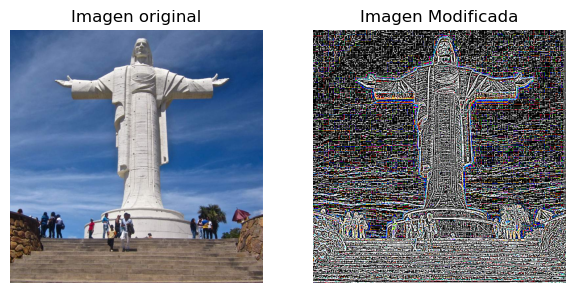

In [14]:
import cv2 
import matplotlib.pyplot as plt

img = cv2.imread('cristo.jpg')
img_gray = cv2.Laplacian(img, cv2.CV_64F)
img_gla = cv2.GaussianBlur(img_gray, (3, 3),0)


plt.figure(figsize=(15, 12))

plt.subplot(3, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen original')
plt.axis('off')


plt.subplot(3, 4, 2)
plt.imshow(img_gla)
plt.title('Imagen Modificada')
plt.axis('off')



